Let’s import the libraries that we are going to use for data manipulation, visualization, training the model, etc.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.4f' % x)
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from pandas.io.json import json_normalize
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
# performace metrics libray
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# select the GPU
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1' # SET A SINGLE GPU

### Load the datasets

In [2]:
def load_dataset(file2015, file2016, file2017, file2018):
    base_2015 = pd.read_json(file2015)
    print('Dataset 2015 => ', base_2015.shape)
    base_2016 = pd.read_json(file2016)
    print('Dataset 2016 => ', base_2016.shape)
    base_2017 = pd.read_json(file2017)
    print('Dataset 2017 => ', base_2017.shape)
    base_2018 = pd.read_json(file2018)
    print('Dataset 2018 => ', base_2018.shape)
    return base_2015, base_2016, base_2017, base_2018

In [3]:
base_2015, base_2016, base_2017, base_2018 = load_dataset('../../data/raw_dataset/br2015-2.json', 
             '../../data/raw_dataset/br2016.json', 
             '../../data/raw_dataset/br2017full.json',
            '../../data/raw_dataset/br2018.json')

Dataset 2015 =>  (1829189, 19)
Dataset 2016 =>  (2498313, 19)
Dataset 2017 =>  (2629808, 24)
Dataset 2018 =>  (5288424, 24)


In [4]:
def drop_col_values_missing(dataset):
    dataset = dataset.drop(['AS_name','_id','city','elapsed_target','internal_address','platform','real_address','remote_address','version',],axis=1)
    dataset.dropna(inplace=True)
    print('\nSum values end missing:\n')
    print(dataset.isna().sum())
    print('\n', dataset.shape)
    return dataset

In [10]:
def drop_col_values_missing_another(dataset):
    dataset = dataset.drop(['AS_name','_id','city',
                                  'elapsed_target','internal_address',
                                  'platform','real_address',
                                  'remote_address','version',
                                  'engine_name','engine_version',
                                  'fast_scale_down','constant_bitrate',
                                  'use_fixed_rates'], axis=1)
    dataset.dropna(inplace=True)
    print('\nSum the end missing values:\n')
    print(dataset.isna().sum())
    print('\nLast shape:\n', dataset.shape)
    return dataset

In [5]:
def cria_sessao(df):
    # performace: O(n**2)
    print("creating session...")
    df.sort_values(['uuid','timestamp','iteration'], inplace=True)
    df['session'] = df['iteration']

    val = df.uuid.value_counts()
    val = val.index

    cont = -1
    aux = df[df['uuid'] == val[0]]
    x2 = aux.index
    x2 = x2[0]    
    for i in val:
        aux = df[df['uuid'] == i]
        for x in aux.index:
            if df.iteration.loc[x] <= df.iteration.loc[x2]:
                cont += 1
            df.session.loc[x] = cont
            x2 = x
    return df

In [5]:
def drop_not_year(base, year):
    # base.sort_values(['timestamp','uuid','iteration'], inplace=True, ascending=True)
    indice = base[base['timestamp'].dt.year != year].index
    base.drop(indice, inplace=True)
    base = base.reset_index(drop=True)
    print('\n', base.shape)
    return base

In [5]:
def sort_df(df, column_idx):
    '''Takes dataframe, column index and custom function for sorting, 
    returns dataframe sorted by this column using this function'''
    
    col = df.ix[:,column_idx]
    temp = pd.DataFrame([])
    temp[0] = col
    temp[1] = df.index
    temp = temp.values.tolist()
    df = df.ix[[i[1] for i in sorted(temp, key=None)]]
    return df

### Data from year 2015

In [6]:
dataset_2015 = base_2015.copy()
print('\nSum values missing:\n')
print(dataset_2015.isnull().sum())
dataset_2015 = drop_col_values_missing(dataset_2015)
dataset_2015 = drop_not_year(dataset_2015, 2015)
# dataset_2015['timestamp'] = dataset_2015['timestamp'] - datetime.timedelta(hours=4)


Sum values missing:

AS_name                30
_id                     0
city                53425
connect_time            0
delta_sys_time          0
delta_user_time         0
elapsed                 0
elapsed_target          0
internal_address        0
iteration               0
platform                0
rate                    0
real_address            0
received                0
remote_address          0
request_ticks           0
timestamp               0
uuid                    0
version                 0
dtype: int64

Sum values end missing:

connect_time       0
delta_sys_time     0
delta_user_time    0
elapsed            0
iteration          0
rate               0
received           0
request_ticks      0
timestamp          0
uuid               0
dtype: int64

 (1829189, 10)

 (1829009, 10)


In [ ]:
# dataset_2015 = cria_sessao(dataset_2015)
# dataset_2015.to_csv('../base_vazao_sessao_2015.csv', encoding='utf-8', index=False)

### Estatísticas

In [ ]:
dataset_2015.info()

In [ ]:
dataset_2015.describe()

###  Data from year 2016

In [7]:
####### data from year 2016 #########
dataset_2016 = base_2016.copy()
print('Sum values missing initial:\n')
print(dataset_2016.isna().sum())
dataset_2016 = drop_col_values_missing(dataset_2016)
dataset_2016 = drop_not_year(dataset_2016, 2016)
# dataset_2016 = cria_sessao(dataset_2016)
# dataset_2016.to_csv('../base_vazao_sessao_2016.csv', encoding='utf-8', index=False)

Sum values missing initial:

AS_name                 0
_id                     0
city                68325
connect_time            0
delta_sys_time          0
delta_user_time         0
elapsed                 0
elapsed_target          0
internal_address        0
iteration               0
platform                0
rate                    0
real_address            0
received                0
remote_address          0
request_ticks           0
timestamp               0
uuid                    0
version                 0
dtype: int64

Sum values end missing:

connect_time       0
delta_sys_time     0
delta_user_time    0
elapsed            0
iteration          0
rate               0
received           0
request_ticks      0
timestamp          0
uuid               0
dtype: int64

 (2498313, 10)

 (2498179, 10)


### Estatísticas

In [ ]:
dataset_2016.info()

In [ ]:
dataset_2016.describe()

### Data from year 2017

In [ ]:
dataset_2017 = base_2017.copy()
print('Sum initial missing values:\n')
print(dataset_2017.isna().sum())
dataset_2017 = drop_col_values_missing_another(dataset_2017)
dataset_2017 = drop_not_year(dataset_2017, 2017)
# dataset_2017 = cria_sessao(dataset_2017)
# dataset_2017.to_csv('../base_vazao_sessao_2017.csv', encoding='utf-8', index=False)

### Estatísticas

In [ ]:
dataset_2017.info()

In [ ]:
dataset_2017.describe()

### Data from year 2018

In [ ]:
dataset_2018 = base_2018.copy()
print('Sum values missing initial:\n')
print(dataset_2018.isnull().sum())
dataset_2018 = drop_col_values_missing_another(dataset_2018)
dataset_2018 = drop_not_year(dataset_2018, 2018)
# dataset_2018 = cria_sessao(dataset_2018)
# dataset_2018.to_csv('../base_vazao_sessao_2018.csv', encoding='utf-8', index=False)

In [89]:
# dataset_2018.to_csv('../base_vazao_2018_2.csv', encoding='utf-8', index=False)

### Estatísticas

In [ ]:
dataset_2018.info()

In [ ]:
dataset_2018.describe()

### 1. Merge DataSets

In [2]:
dataset_sess_2015 = pd.read_csv('../../data/session_neubot/base_vazao_sessao_2015.csv')
print(dataset_sess_2015.shape)
dataset_sess_2016 = pd.read_csv('../../data/session_neubot/base_vazao_sessao_2016.csv')
print(dataset_sess_2016.shape)
dataset_sess_2017 = pd.read_csv('../../data/session_neubot/base_vazao_sessao_2017.csv')
print(dataset_sess_2017.shape)
dataset_sess_2018 = pd.read_csv('../../data/session_neubot/base_vazao_sessao_2018.csv')
print(dataset_sess_2018.shape)

(1829009, 11)
(2498179, 11)
(2629728, 11)
(5288239, 11)


In [3]:
def merge_data(dataset_2015, dataset_2016, dataset_2017, dataset_2018):
    base_vazao = dataset_2015.append(dataset_2016, ignore_index=True, sort=False)
    print('First Merge => ', base_vazao.shape)
    
    base_vazao = base_vazao.append(dataset_2017, ignore_index=True, sort=False)
    print('Second Merge => ', base_vazao.shape)
    
    base_vazao = base_vazao.append(dataset_2018, ignore_index=True, sort=False)
    print('Last Merge =>', base_vazao.shape)
    return base_vazao

In [8]:
def remove_data_duplicates(base):
    base.drop_duplicates(inplace=True)
    base = base.reset_index(drop=True)
    return base

In [8]:
def create_delay(df):
    array_feat = np.zeros(df.shape[0], dtype=np.float)
    array_feat[0] = df['elapsed'][0] # if initial value in iteration is equal 1
    for index in range(1, len(df['iteration'])):
        if df['iteration'][index] == 0 :
            array_feat[index] = df['elapsed'][index]
        elif df['iteration'][index] == 1 and df['iteration'][index-1] != 0:
            array_feat[index] = df['elapsed'][index]
        else:
            array_feat[index] = abs(float(df['elapsed'][index]-df['elapsed'][index-1]))
    return array_feat

In [7]:
def add_features(df_vazao):
    df_vazao['timestamp'] = pd.to_datetime(df_vazao['timestamp'])  # convert in datetime 
    df_vazao['year'] = df_vazao['timestamp'].dt.year
    df_vazao['month'] = df_vazao['timestamp'].dt.month
    df_vazao['day'] = df_vazao['timestamp'].dt.day
    df_vazao['weekday'] = df_vazao['timestamp'].dt.weekday
    df_vazao['hour'] = df_vazao['timestamp'].dt.hour
    df_vazao['minute'] = df_vazao['timestamp'].dt.minute
    df_vazao['second'] = df_vazao['timestamp'].dt.second
    df_vazao["downthpt"] = df_vazao.apply(lambda row: ((row["received"]/1000)/row["elapsed"]), axis=1) # in gbps
    # df_vazao["downthpt"] = pd.to_numeric(df_vazao["downthpt"])
    df_vazao["tcp_mean_wind"] = df_vazao.apply(lambda row: (row['connect_time'] * row['downthpt']), axis=1)
    # df_vazao['delay'] = create_delay(df_vazao)
    # df_vazao = df_vazao.drop(['elapsed'], axis=1)
    df_vazao = df_vazao.drop(['session'], axis=1)
    df_vazao = df_vazao.drop(['uuid'], axis=1)
    print(df_vazao.shape)
    return df_vazao

In [11]:
def add_features_another(base_vazao):
    base_vazao['year'] = base_vazao['timestamp'].apply(lambda x: x.year)
    base_vazao['quarter'] = base_vazao['timestamp'].apply(lambda x: x.quarter)
    base_vazao['month'] = base_vazao['timestamp'].apply(lambda x: x.month)
    base_vazao['day'] = base_vazao['timestamp'].apply(lambda x: x.day)
    base_vazao['hour'] = base_vazao['timestamp'].apply(lambda x: x.hour)
    base_vazao['minute'] = base_vazao['timestamp'].apply(lambda x: x.minute)
    base_vazao['second'] = base_vazao['timestamp'].apply(lambda x: x.second)
    base_vazao["weekday"] = base_vazao.apply(lambda row: row['timestamp'].weekday(),axis=1)
    base_vazao["weekday"] = (base_vazao["weekday"] < 5).astype(int)
    base_vazao["downthpt"] = base_vazao.apply(lambda row: ((row["received"]/125)/row["elapsed"]), axis=1)
    # base_vazao = base_vazao.drop(['timestamp'], axis=1)
    base_vazao = base_vazao.drop(['elapsed'], axis=1)
    return base_vazao

In [8]:
dataset2015 = add_features(dataset_sess_2015)

(1829009, 18)


In [9]:
dataset2016 = add_features(dataset_sess_2016)

(2498179, 18)


In [10]:
dataset2017 = add_features(dataset_sess_2017)

(2629728, 18)


In [11]:
dataset2018 = add_features(dataset_sess_2018)

(5288239, 18)


In [12]:
dataset_throughput = merge_data(dataset2015, dataset2016, dataset2017, dataset2018)

First Merge =>  (4327188, 18)
Second Merge =>  (6956916, 18)
Last Merge => (12245155, 18)


In [13]:
data_elapsed = dataset_throughput.elapsed

In [15]:
df = pd.DataFrame(data_elapsed.values, columns=['elapsed'])

In [17]:
# saving the dataframe 
df.to_csv('../../data/data_elapsed.csv', encoding='utf-8', index=False)

Load dataset

In [18]:
base_vazao = pd.read_csv('../dataset_throughput.csv', delimiter=',')

In [8]:
print('Time series start at: ', base_vazao.timestamp.min())
print('Time series end at: ', base_vazao.timestamp.max())

Time series start at:  2015-01-01 00:04:42
Time series end at:  2018-12-31 23:58:54


## PLots

Plot da Vazão Média agrupada por Ano, Trimestre, Mês e Dia.

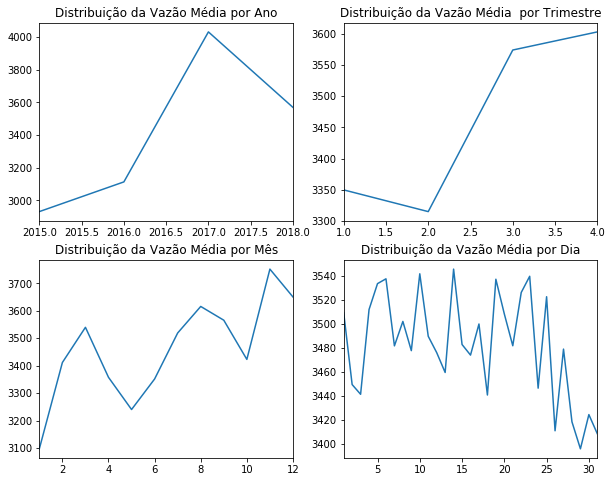

In [80]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
base_vazao.groupby('year').downthpt.agg('mean').plot()
plt.xlabel('')
plt.title('Distribuição da Vazão Média por Ano')

plt.subplot(2,2,2)
base_vazao.groupby('quarter').downthpt.agg('mean').plot()
plt.xlabel('')
plt.title('Distribuição da Vazão Média  por Trimestre')

plt.subplot(2,2,3)
base_vazao.groupby('month').downthpt.agg('mean').plot()
plt.xlabel('')
plt.title('Distribuição da Vazão Média por Mês')

plt.subplot(2,2,4)
base_vazao.groupby('day').downthpt.agg('mean').plot()
plt.xlabel('')
plt.title('Distribuição da Vazão Média por Dia')
plt.show()

Vazão por Ano

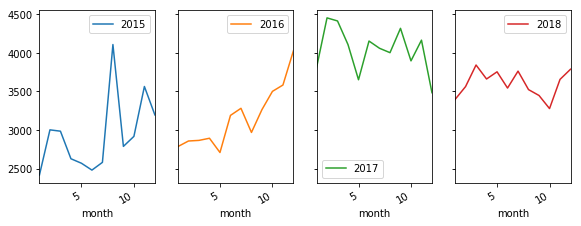

In [81]:
pd.pivot_table(base_vazao, 
               values='downthpt', 
               index='month',
               columns='year').plot(subplots = True, figsize=(12,12), layout=(3,5), sharey=True);

Vazão Ativa em Dias da semana vs. Finais de semana

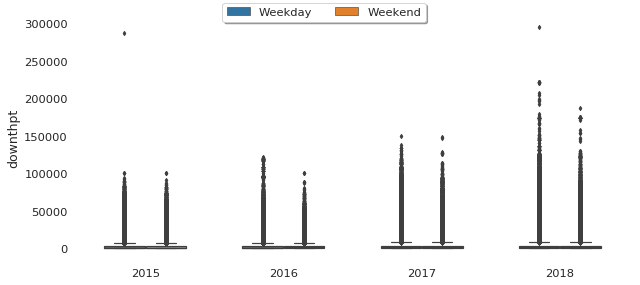

In [92]:
dic={0:'Weekend',1:'Weekday'}
base_vazao['Day'] = base_vazao.weekday.map(dic)
a=plt.figure(figsize=(9,4)) 
plt1=sns.boxplot('year','downthpt',hue='Day',width=0.6,fliersize=3,
                    data=base_vazao)                                                                                                                                                                                                                                                                                                                                                 
a.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
sns.despine(left=True, bottom=True) 
plt.xlabel('')
plt.tight_layout()                                                                                                                  
plt.legend().set_visible(False);

Plot do Fator da Vazão pelo Final de semena/Dia da Semana

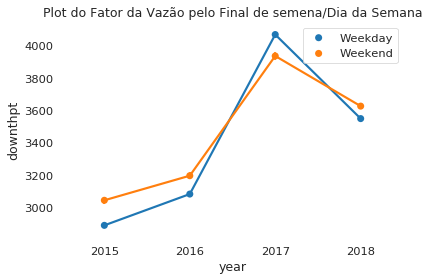

In [94]:
plt1=sns.factorplot('year','downthpt',hue='Day',
                    data=base_vazao, size=4, aspect=1.5, legend=False)                                                                                                                                                                                                                                                                                                                                             
plt.title('Plot do Fator da Vazão pelo Final de semena/Dia da Semana')                                                             
plt.tight_layout()                                                                                                                  
sns.despine(left=True, bottom=True) 
plt.legend(loc='upper right');

Dickey-Fuller test

In [95]:
base_vazao=base_vazao.loc[:,['timestamp','downthpt', 'year','quarter','month','day']]

In [100]:
base_vazao['timestamp']=pd.to_datetime(base_vazao['timestamp'])

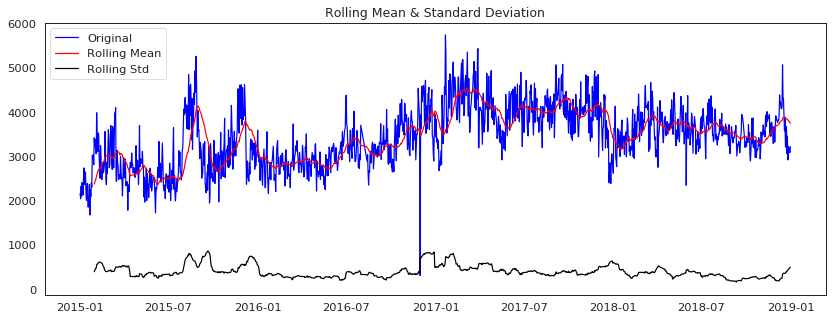

<Resultados of Dickey-Fuller Test>
Teste Estatístico               -4.5311
p-value                          0.0002
#Lags Used                       7.0000
Numero de observações usada   1442.0000
Valor Crítico (5%)              -2.8635
Valor Crítico (1%)              -3.4349
Valor Crítico (10%)             -2.5678
dtype: float64


In [103]:
df2=base_vazao.resample('D', on='timestamp', how=np.mean)

def test_stationarity(timeseries):
    rolmean = timeseries.rolling(window=30).mean()
    rolstd = timeseries.rolling(window=30).std()
    
    plt.figure(figsize=(14,5))
    sns.despine(left=True)
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')

    plt.legend(loc='best'); plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    print ('<Resultados of Dickey-Fuller Test>')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],
                         index=['Teste Estatístico','p-value','#Lags Used','Numero de observações usada'])
    for key,value in dftest[4].items():
        dfoutput['Valor Crítico (%s)'%key] = value
    print(dfoutput)
test_stationarity(df2.downthpt.dropna())

In [ ]:
plt.figure(figsize=(20,10))

plt.plot(X_train_values.index, test, '.-', color='red', label='Train set', alpha=0.5)
plt.plot(train.index, y_test, '.-', color='blue', label='Test set', alpha=0.5)

plt.ylabel(r'Throughput [Kbits/s]' % magnitude, fontsize=14)
plt.xlabel('datetime', fontsize=14) #TODO: set x values as actual dates

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

plt.legend(loc='upper left', borderaxespad=0, frameon=False, fontsize=14, markerscale=3)

In [4]:
def min_max_scaler(input_feature):
    scaler = MinMaxScaler(feature_range=(0, 1))
    input_feature[:,:6] = scaler.fit_transform(input_feature[:,:6])
    return input_feature

def ordinal_encoder(input_feature):
    from sklearn.preprocessing import OrdinalEncoder
    encoder = OrdinalEncoder()
    input_feature[:,7] = input_feature[:,7].reshape(len(input_feature[:,7]),1)
    input_feature[:,7] = encoder.fit_transform(input_feature[:,7])
    return input_feature

def one_hot_coding(input_feature):
    # binary encode
    onehot_encoder = OneHotEncoder(sparse=False, categories='auto')
    input_feature[:,7:] = np.reshape(len(input_feature[:,7:]), (-1,1))
    input_feature[:,7:] = onehot_encoder.fit_transform(input_feature[:,7:])
    return input_feature

def get_dumies(base_vazao):
    for i in ['year','month','day','weekday','hour','minute','second']:
        cat_dummies = pd.get_dummies(base_vazao[i], prefix = i,prefix_sep='_', drop_first=True)
        base_vazao = base_vazao.drop(i, axis = 1).join(cat_dummies)
    return base_vazao

def prepare_inputs(base_vazao):
    for col in range(base_vazao.shape[1]):
        base_vazao.iloc[:, col] = base_vazao.iloc[:, col].apply(lambda row: np.reshape(row,(-1, 1)))
        base_vazao.iloc[:, col] = onehot_encoder.fit_transform(base_vazao.iloc[:, col])                                                   
    return base_vazao

input_feature = base_vazao.values.astype('float32')
# input_feature = get_dumies(base_vazao)
input_feature = min_max_scaler(input_feature)
# input_feature = ordinal_encoder(input_feature)
input_feature = one_hot_coding(input_feature)